# Introduction

We will be using the scikit-learn library (Python) - https://scikit-learn.org/stable/. It is one of the well-used machine learning libraries. In this notebook, the goal is to familiarize with the scikit-learn library as well as numpy (which is a very common library for mathematical tasks in Python - https://numpy.org/) and matplotlib (for creating plots - https://matplotlib.org/).

### Linear regression

Let's start with exploring linear regression modelling.

#### Section 1

In [1]:
import numpy

random_seed = 5 # we specify a seed so that we have reproducible results

"""
default_rng is the recommended constructor for the random number class Generator.
Here are several ways we can construct a random number generator using default_rng and the Generator class."""
rng =  numpy.random.default_rng(random_seed) 
training_data_x = rng.random((4, 1))
training_labels_y = rng.random((4, 1))

print('A randomly generated n x d input data where n=4 and d=1, i.e. 4 data instances each with 1 feature: \n')
print(training_data_x)

A randomly generated n x d input data where n=4 and d=1, i.e. 4 data instances each with 1 feature: 

[[0.80500292]
 [0.80794079]
 [0.51532556]
 [0.28580138]]


#### Section 2

The weights: [[0.20316895]]
The bias: [0.10014594]

 Mean squared error (training error): 0.03 


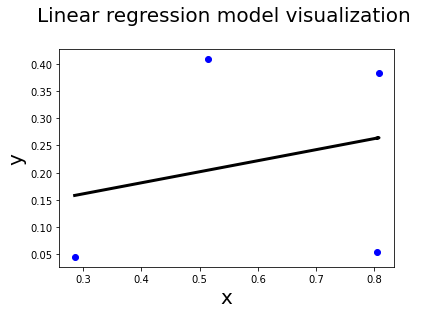

In [2]:
%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Train a linear regression model
lr_model = linear_model.LinearRegression()
lr_model.fit(training_data_x, training_labels_y)
print("The weights:",  lr_model.coef_)
print("The bias:",  lr_model.intercept_)

# Check the performance of the model on the data used to train it
training_pred_y = lr_model.predict(training_data_x)
print("\n Mean squared error (training error): %.2f " % mean_squared_error(training_labels_y, training_pred_y))


# Plot data and model
plt.scatter(training_data_x, training_labels_y, color="blue")
plt.plot(training_data_x, training_pred_y, color="black", linewidth=3)

plt.xlabel('x', size=20)
plt.ylabel('y', size=20)
plt.title('Linear regression model visualization \n', size=20)

plt.show()

#### Section 3


 Mean squared error (test error): 0.56 


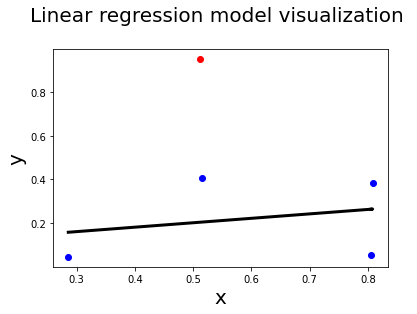

In [3]:
# Check the performance of the model on test data not seen by the model in training
random_seed = 1
rng =  numpy.random.default_rng(random_seed)
test_data_x = rng.random((1, 1))
test_labels_y = rng.random((1, 1))
test_pred_y = lr_model.predict(test_data_x)
print("\n Mean squared error (test error): %.2f " % mean_squared_error(test_labels_y, test_pred_y))


# Plot data and model
plt.scatter(training_data_x, training_labels_y, color="blue")
plt.scatter(test_data_x, test_labels_y, color="red")
plt.plot(training_data_x, training_pred_y, color="black", linewidth=3)

plt.xlabel('x', size=20)
plt.ylabel('y', size=20)
plt.title('Linear regression model visualization \n', size=20)

plt.show()

**B. REGULARIZATION - RIDGE REGRESSION IMPLEMENTATION (L2_Regularization)**

Ridge Regression_L2_Regularization: The cost function used in Ridge Regression is a modified function of any cost function. ie.MAE,MSE,RMSE,etc. with an added Penalty term that penalizes the ,model for predicting wrong values. Thus reducing overfitting.

Taking a cost function:

Summation[(y_actual-y_predicted)^2] --> This is the standard cost function.

Summation[(y_actual-y_predicted)^2] + Lambda * Summation[ (Slopes of all Features)^2 ] --> (Penalty Term)-->This is the modified cost function for Ridge Regression.

Slopes are weight of features.

In sklearn the Lambda is renamed as Alpha where Alpha can take any postive value from 0 to Infinity.

(Alpha's value is considered only positive as we want the model to find the best fit line with least Loss accuracy. But if we apply Negative Aplha value we are reducing the error from its actual value instead of penalizing it.

Alpha is hyperparameter which needs to be tuned which helps us to tune error and reduces model overfitting.

Summation[(y_actual-y_predicted)^2] =100 --> 100 is the total residual

> y_predicted=B0+B1x1+B2x2 Lambda=0.1 B1=2 B2=4


> 100 + 0.1 * Summation[ (2^2) + (4^2)] = 100 +2 =102




Total errors are 102.






In [4]:
import numpy

random_seed = 5 # we specify a seed so that we have reproducible results

"""
default_rng is the recommended constructor for the random number class Generator.
Here are several ways we can construct a random number generator using default_rng and the Generator class."""
rng =  numpy.random.default_rng(random_seed) 
training_data_x = rng.random((4, 1))
training_labels_y = rng.random((4, 1))

print('A randomly generated n x d input data where n=4 and d=1, i.e. 4 data instances each with 1 feature: \n')
print(training_data_x)

A randomly generated n x d input data where n=4 and d=1, i.e. 4 data instances each with 1 feature: 

[[0.80500292]
 [0.80794079]
 [0.51532556]
 [0.28580138]]


The weights: [[0.03259736]]
The bias: [0.20308891]

 Mean squared error (training error): 0.03 


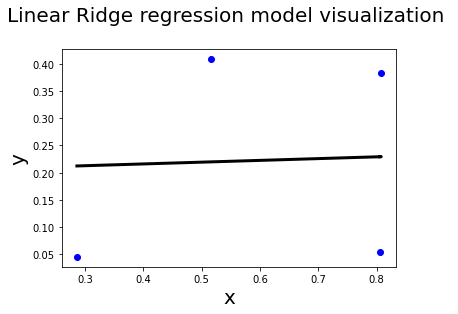

In [5]:
%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Train a linear regression model
alpha=1.0
lr_model_ridge= linear_model.Ridge(alpha=alpha)
lr_model_ridge.fit(training_data_x, training_labels_y)
print("The weights:",  lr_model_ridge.coef_)
print("The bias:",  lr_model_ridge.intercept_)

# Check the performance of the model on the data used to train it
training_pred_y = lr_model_ridge.predict(training_data_x)
print("\n Mean squared error (training error): %.2f " % mean_squared_error(training_labels_y, training_pred_y))


# Plot data and model
plt.scatter(training_data_x, training_labels_y, color="blue")
plt.plot(training_data_x, training_pred_y, color="black", linewidth=3)

plt.xlabel('x', size=20)
plt.ylabel('y', size=20)
plt.title('Linear Ridge regression model visualization \n', size=20)

plt.show()

In [6]:
%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
# Train a linear regression model

def fit_lr_model_ridge_different_alpha(alpha):
  df_diff_alpha=pd.DataFrame(columns=["Alpha","Mean_Squared_Error"])
  for a in alpha:
    lr_model_ridge= linear_model.Ridge(alpha=a)
    lr_model_ridge.fit(training_data_x, training_labels_y)

    #Check the performance of the model on the data used to train it
    training_pred_y = lr_model_ridge.predict(training_data_x)
    mse=mean_squared_error(training_labels_y, training_pred_y)

    #Insert Dict to the dataframe using DataFrame.append()
    new_row = {'Alpha':a, 'Mean_Squared_Error':mse}
    df_diff_alpha = df_diff_alpha.append(new_row, ignore_index=True)
  print(df_diff_alpha)

In [7]:
alpha=[0.0001, 0.001, 0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20,50,100,500,1000]
fit_lr_model_ridge_different_alpha(alpha)

        Alpha  Mean_Squared_Error
0      0.0001            0.028100
1      0.0010            0.028100
2      0.0100            0.028105
3      0.0500            0.028185
4      0.1000            0.028333
5      0.2000            0.028616
6      0.3000            0.028836
7      0.4000            0.029003
8      0.5000            0.029132
9      0.6000            0.029234
10     0.7000            0.029317
11     0.8000            0.029385
12     0.9000            0.029442
13     1.0000            0.029490
14     2.0000            0.029743
15     3.0000            0.029843
16     4.0000            0.029896
17     5.0000            0.029930
18     6.0000            0.029952
19     7.0000            0.029969
20     8.0000            0.029981
21     9.0000            0.029991
22    10.0000            0.029999
23    20.0000            0.030035
24    50.0000            0.030057
25   100.0000            0.030065
26   500.0000            0.030071
27  1000.0000            0.030071


**C. REGULARIZATION - LASSO REGRESSION IMPLEMENTATION (L1_Regularization)**

Lasso Regression_L1_Regularization : The cost function used in Lasso Regression is a modified function of any cost function. ie.MAE,MSE,RMSE,etc. with an added Penalty term that penalizes the ,model for predicting wrong values. Thus reducing overfitting.

Taking a cost function:

Summation[(y_actual-y_predicted)^2] --> This is the standard cost function.

Summation[(y_actual-y_predicted)^2] + Lambda * Summation[ | (Slopes of all Features)| ] --> (Penalty Term) This is the modified cost function for Lasso Regression.

Note--> || is a modulo function

Slopes are weight of features.

In sklearn the Lambda is renamed as Alpha where Alpha can take any postive value from 0 to Infinity.

(Alpha's value is considered only positive as we want the model to find the best fit line with least Loss accuracy. But if we apply Negative Aplha value we are reducing the error from its actual value instead of penalizing it.

Alpha is hyperparameter which needs to be tuned which helps us to tune error and reduces model overfitting.

Summation[(y_actual-y_predicted)^2] =100 --> 100 is the total residual



> y_predicted=B0+B1x1+B2x2 Lambda=0.1 B1=2 B2=4

> 100 + 0.1 * Summation[ |2| + | 4|] = 100 +0.6 =100.6

Total errors are 100.6.

In [8]:
import numpy

random_seed = 5 # we specify a seed so that we have reproducible results

"""
default_rng is the recommended constructor for the random number class Generator.
Here are several ways we can construct a random number generator using default_rng and the Generator class."""
rng =  numpy.random.default_rng(random_seed) 
training_data_x = rng.random((4, 1))
training_labels_y = rng.random((4, 1))

print('A randomly generated n x d input data where n=4 and d=1, i.e. 4 data instances each with 1 feature: \n')
print(training_data_x)

A randomly generated n x d input data where n=4 and d=1, i.e. 4 data instances each with 1 feature: 

[[0.80500292]
 [0.80794079]
 [0.51532556]
 [0.28580138]]


The weights: [0.]
The bias: [0.222762]

 Mean squared error (training error): 0.03 


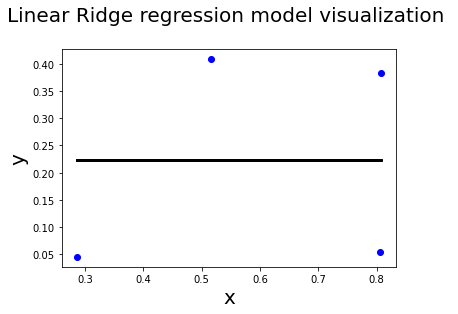

In [9]:
%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Train a linear regression model
alpha=1.0
lr_model_lasso= linear_model.Lasso(alpha=alpha)
lr_model_lasso.fit(training_data_x, training_labels_y)
print("The weights:",  lr_model_lasso.coef_)
print("The bias:",  lr_model_lasso.intercept_)

# Check the performance of the model on the data used to train it
training_pred_y = lr_model_lasso.predict(training_data_x)
print("\n Mean squared error (training error): %.2f " % mean_squared_error(training_labels_y, training_pred_y))


# Plot data and model
plt.scatter(training_data_x, training_labels_y, color="blue")
plt.plot(training_data_x, training_pred_y, color="black", linewidth=3)

plt.xlabel('x', size=20)
plt.ylabel('y', size=20)
plt.title('Linear Ridge regression model visualization \n', size=20)

plt.show()

In [10]:
%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
# Train a linear regression model

def fit_lr_model_lasso_different_alpha(alpha):
  df_diff_alpha=pd.DataFrame(columns=["Alpha","Mean_Squared_Error"])
  for a in alpha:
    lr_model_lasso= linear_model.Lasso(alpha=a)
    lr_model_lasso.fit(training_data_x, training_labels_y)

    #Check the performance of the model on the data used to train it
    training_pred_y = lr_model_lasso.predict(training_data_x)
    mse=mean_squared_error(training_labels_y, training_pred_y)

    #Insert Dict to the dataframe using DataFrame.append()
    new_row = {'Alpha':a, 'Mean_Squared_Error':mse}
    df_diff_alpha = df_diff_alpha.append(new_row, ignore_index=True)
  print(df_diff_alpha)

In [11]:
alpha=[0.0001, 0.001, 0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20,50,100,500,1000]
fit_lr_model_lasso_different_alpha(alpha)

        Alpha  Mean_Squared_Error
0      0.0001            0.028100
1      0.0010            0.028121
2      0.0100            0.030072
3      0.0500            0.030072
4      0.1000            0.030072
5      0.2000            0.030072
6      0.3000            0.030072
7      0.4000            0.030072
8      0.5000            0.030072
9      0.6000            0.030072
10     0.7000            0.030072
11     0.8000            0.030072
12     0.9000            0.030072
13     1.0000            0.030072
14     2.0000            0.030072
15     3.0000            0.030072
16     4.0000            0.030072
17     5.0000            0.030072
18     6.0000            0.030072
19     7.0000            0.030072
20     8.0000            0.030072
21     9.0000            0.030072
22    10.0000            0.030072
23    20.0000            0.030072
24    50.0000            0.030072
25   100.0000            0.030072
26   500.0000            0.030072
27  1000.0000            0.030072
